In [1]:
from pathlib import Path
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import sys
import itertools
import numpy as np
from matplotlib.lines import Line2D

In [ ]:
def get_all_entries(i_file, dirn, lenth, support):
  global result_dict
  labels = []
  #print("doing file: {} ".format(i_file))
  df_check = pd.read_csv(i_file, sep='\t', dtype=str)
  all = df_check.shape[0]
  #print(all)
  one_class=0
  many_class=0
  for event in ['legit', 'scan-in-noise', 'login', 'scan-out', 'scan-in', 'loader', 'cnc', 'http_ddos', 'dns_rddos']:
    temp_cnt = df_check[df_check['label'] == event]['iot'].count()
    one_class += temp_cnt
    result_dict[support][lenth][event]+=temp_cnt

  #print(fp)
  many_class=all-one_class
  result_dict[support][lenth]['many']+=many_class

In [ ]:
result_dict = {}
#os.chdir('../codes/FIM/src/')
for filename in Path('data_mask_16').glob('**/*'):
  if str(filename).find('dir') >= 0 and str(filename).find('labled') >= 0:
    splitstr=str(filename).split('/')
    support=splitstr[1].split('_')[1]
    dirn=splitstr[3].split('_')[1]
    lenth=splitstr[2].split('_')[1]
    try:
      if not lenth in result_dict[support].keys():
        result_dict[support][lenth] = {'legit':0, 'scan-in-noise':0, 'login':0, 'scan-out':0, 'scan-in':0, 'loader':0, 'cnc':0, 'http_ddos':0, 'dns_rddos':0, 'many':0}
    except:
      result_dict[support] = {}
      result_dict[support][lenth] = {'legit':0, 'scan-in-noise':0, 'login':0, 'scan-out':0, 'scan-in':0, 'loader':0, 'cnc':0, 'http_ddos':0, 'dns_rddos':0, 'many':0}
    get_all_entries(str(filename), dirn, lenth, support)

In [ ]:
result_dict

In [ ]:
legit=[[], [], [], []]
scan_noise=[[], [], [], []]
login=[[], [], [], []]
scanout=[[], [], [], []]
scanin=[[], [], [], []]
loader=[[], [], [], []]
cnc=[[], [], [], []]
http_ddos=[[], [], [], []]
dns_rddos=[[], [], [], []]
many=[[], [], [], []]
support=[]
#for key,val in result_dict.items():
for s in range(4,102,6):
  support.append(s)
  val = result_dict[str(s)]
  #print(val)
  for k,v in val.items():
        try:
          legit[int(k)-1].append(v['legit'])
          scan_noise[int(k)-1].append(v['scan-in-noise'])
          login[int(k)-1].append(v['login'])
          scanout[int(k)-1].append(v['scan-out'])
          scanin[int(k)-1].append(v['scan-in'])
          loader[int(k)-1].append(v['loader'])
          cnc[int(k)-1].append(v['cnc'])
          http_ddos[int(k)-1].append(v['http_ddos'])
          dns_rddos[int(k)-1].append(v['dns_rddos'])
          many[int(k)-1].append(v['many'])
        except:
          print(k,v)
          print(sys.exc_info())

In [ ]:
for store, event in zip([legit, scan_noise, login, scanout, scanin, loader, cnc, http_ddos, dns_rddos, many],\
                      ['Legitimate', 'Scan-in noise', 'Login', 'Scan-Out', 'Scan-In', 'Loader', 'C&C',\
                       'HTTP-DDoS', 'DNS-RDDoS', 'Multi-Label']):
  #plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
  fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True, dpi=300, facecolor='w', edgecolor='k')
  fig.suptitle('{} Events'.format(event))
  fig.text(0.5, 0.04, 'Support', ha='center')
  fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')
  axs[0, 0].bar(support, store[0])
  axs[0, 0].set_title('Length-1 Itemsets')
  axs[0, 1].bar(support, store[1])
  axs[0, 1].set_title('Length-2 Itemsets')
  axs[1, 0].bar(support, store[2])
  axs[1, 0].set_title('Length-3 Itemsets')
  axs[1, 1].bar(support, store[3])
  axs[1, 1].set_title('Length-4 Itemsets')
  #plt.savefig('plots/{}_nosubnet_line.png'.format(event))

In [ ]:
for store, event in zip([legit, scan_noise, login, scanout, scanin, loader, cnc, http_ddos, dns_rddos, many],\
                      ['Legitimate', 'Scan-in noise', 'Login', 'Scan-Out', 'Scan-In', 'Loader', 'C&C',\
                       'HTTP-DDoS', 'DNS-RDDoS', 'Multi-Label']):
  plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
  plt.plot(support, store[0], label='Length-1 Itemsets')
  plt.plot(support, store[1], label='Length-2 Itemsets')
  plt.plot(support, store[2], label='Length-3 Itemsets')
  plt.plot(support, store[3], label='Length-4 Itemsets')
  plt.title(event)
  plt.ylabel('Count')
  plt.xlabel('Support')
  plt.legend()
  plt.grid()
  plt.savefig('plots/{}_subnet16_line.png'.format(event))

In [ ]:
for cnt in range(0,4):
  plt.figure(figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
  for i,j in zip([legit, scan_noise, login, scanout, scanin, loader, cnc, http_ddos, dns_rddos, many],\
                      ['Legitimate', 'Scan-in noise', 'Login', 'Scan-Out', 'Scan-In', 'Loader', 'C&C',\
                       'HTTP-DDoS', 'DNS-RDDoS', 'Multi-Label']):
    plt.plot(support, i[cnt], label=j)

  plt.ylabel('Count')
  plt.xlabel('Support')
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=False, ncol=5)
  plt.grid()
  plt.title('Length {} Itemset Comparison'.format(cnt+1))
  plt.savefig('plots/l{}_subnet16_line.png'.format(cnt+1))

In [ ]:
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p', '1', '2', '3', '4'))
marker.__next__()

In [ ]:
result_dict_tp_fp = {}
def get_tp_fp(i_file, dirn, lenth, support):
  global result_dict_tp_fp
  labels = []
  #print("doing file: {} ".format(i_file))
  df_check = pd.read_csv(i_file, sep='\t', dtype=str)
  all = df_check.shape[0]
  #print(all)
  tp=0
  fp=0
  for event in ['legit', 'scan-in-noise']:
    fp+=df_check[df_check['label'] == event]['iot'].count()

  #print(fp)
  tp=all-fp
  result_dict_tp_fp[support][lenth]['fp']+=fp
  result_dict_tp_fp[support][lenth]['tp']+=tp
    
for filename in Path('data_not_ipsubnet').glob('**/*'):
  if str(filename).find('dir') >= 0 and str(filename).find('labled') >= 0:
    splitstr=str(filename).split('/')
    support=splitstr[1].split('_')[1]
    dirn=splitstr[3].split('_')[1]
    lenth=splitstr[2].split('_')[1]
    try:
      if not lenth in result_dict_tp_fp[support].keys():
        #print('here')
        result_dict_tp_fp[support][lenth] = {'tp':0,'fp':0}
    except:
      #print(sys.exc_info())
      result_dict_tp_fp[support] = {}
      result_dict_tp_fp[support][lenth] = {'tp':0,'fp':0}
    get_tp_fp(str(filename), dirn, lenth, support)

In [ ]:
prl=[[], [], [], []]
cnt=[[], [], [], []]
support_tp_fp=[]

for s in range(4,102,6):
  support_tp_fp.append(s)
  val = result_dict_tp_fp[str(s)]
  for k,v in val.items():
        try:
          prl[int(k)-1].append((float(v['tp']))/(v['tp']+v['fp']))
          #cnt[int(k)-1].append(v['tp']+v['fp'])
        except:
          pass
plt.figure(figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
for cnt in range(0,4):
  plt.plot(support_tp_fp, prl[cnt], label='Length-{} Itemset'.format(cnt+1))
plt.ylabel('Precision')
plt.xlabel('Support')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5)
plt.grid()
#plt.title('WithoutSubnet Length {} Itemset Comparison')
plt.savefig('plots/precision_comparison_nosubnet.png'.format(cnt))

In [ ]:
result_dict_tp_fp

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True, dpi=300, facecolor='w', edgecolor='k')
fig.suptitle('Scan-in Noises Labels')
fig.text(0.5, 0.04, 'Support', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')
axs[0, 0].bar(support, scan_noise[0])
axs[0, 0].set_title('Length-1')
axs[0, 1].bar(support, scan_noise[1])
axs[0, 1].set_title('Length-2')
axs[1, 0].bar(support, scan_noise[2])
axs[1, 0].set_title('Length-3')
axs[1, 1].bar(support, scan_noise[3])
axs[1, 1].set_title('Length-4')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True, dpi=300, facecolor='w', edgecolor='k')
fig.suptitle('Legit Labels')
fig.text(0.5, 0.04, 'Support', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')
axs[0, 0].bar(support, legit[0])
axs[0, 0].set_title('Length-1')
axs[0, 1].bar(support, legit[1])
axs[0, 1].set_title('Length-2')
axs[1, 0].bar(support, legit[2])
axs[1, 0].set_title('Length-3')
axs[1, 1].bar(support, legit[3])
axs[1, 1].set_title('Length-4')

In [ ]:
from sklearn import preprocessing
import numpy as np
from pathlib import Path

In [ ]:
df_in=pd.read_csv("../data/fim_input.csv", sep=',', dtype=str)
enc = preprocessing.OrdinalEncoder(dtype=np.uint64)

In [ ]:
cols = df_in.columns.tolist()
data_col  = cols.copy()
data_col.remove('dir')
data_col.remove('label')          
for col in data_col:
    df_in[col] = df_in[col].apply(lambda x: col+'_'+str(x))

In [ ]:
uniq_iot=df_in['iot'].unique().tolist()
uniq_ext=df_in['ext'].unique().tolist()
uniq_sport=df_in['sport'].unique().tolist()
uniq_dport=df_in['dport'].unique().tolist()
uniq_sizeBin=df_in['sizeBin'].unique().tolist()
uniq = np.array(uniq_iot + uniq_ext + uniq_sport + uniq_dport + uniq_sizeBin)
uniq = uniq.reshape(uniq.shape[0],1)

In [ ]:
enc.fit(uniq)

In [ ]:
for flow_dir in ['0','1']:
    bfr = []
    print('Direction: {}'.format(flow_dir))
    df_entries = df_in[df_in['dir']==flow_dir][data_col]
    for index,row in df_entries.iterrows():
        entry=np.array(row.tolist())
        entry = entry.reshape(entry.shape[0],1)
        bfr.append(enc.transform(entry).tolist())
    
    df_w = pd.DataFrame(bfr)
    df_w.to_csv("/tmp/formatted_dir_{}.dat".format(flow_dir), index=False, mode='w', sep=' ')

In [ ]:
a = enc.transform(entry)
a=a.tolist()

In [ ]:
a[0][0], a[1]

In [ ]:
enc.inverse_transform([[1]])

In [ ]:
enc.inverse_transform([[0], [20020], [20105], [20108]])

In [ ]:
le = preprocessing.LabelEncoder()
all_labels = uniq_iot + uniq_ext + uniq_sport + uniq_dport + uniq_sizeBin
le.fit(all_labels)

In [ ]:
all_labels

In [ ]:
list(le.transform(['iot_172.16.4.13', 'dport_6.22']) )

In [ ]:
list(le.inverse_transform([0, 20020, 20105, 20108]))

In [ ]:
def fill_the_patterns(i_itemset, i_cols = ['iot', 'ext', 'sport', 'dport', 'sizeBin']):
    ret_patterns= []
    template_pattern = {}
    for pattern in i_itemset: #self._final_itemset[i_flow_dir]:
            
        template_pattern = {}
        for i in i_cols:
            template_pattern[i]='  *  '

        for value in pattern:
            val = value.split('_')
            if val[0] in i_cols:
                template_pattern[val[0]] = val[1]
                    
        #print(pattern, template_pattern)
        ret_patterns.append(template_pattern.values())

    return template_pattern.keys(),ret_patterns

In [ ]:
def format_output(i_file):
    all_patterns= []
    with open(i_file, 'r') as rp:
        for line in rp.readlines():
            line = line.rstrip('\n')
            y = [int(i) for i in line.split(' ')[:-1]]
            pattern=list(le.inverse_transform(y))
            print(pattern)
            all_patterns.append(pattern)

        hdr, vals = fill_the_patterns(all_patterns)
        df_w = pd.DataFrame(vals, columns=hdr)
          
        file_to_write = i_file+'_labeled'
        df_w.to_csv(file_to_write, index=False, mode='w', sep='\t') 


In [ ]:
for filename in Path("/Users/admin/Downloads/Re__input_data/").glob('*.txt'):
    print('Doing file {}'.format(filename))
    format_output(str(filename))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

expand_match_subnet = {
    "CFI_Charm_Subnet_expand_sub.dat": "Charm", 
    "CFI_FPClose_Subnet_expand_sub.dat": "FPClose",
    "FI_FPGrowth_Subnet_expand_sub.dat" : "FPGrowth",
    "MFI_FPMax_Subnet_expand_sub.dat" : "FPMax"
}

exact_match_subnet = {
    "CFI_Charm_Subnet_exact_sub.dat": "Charm", 
    "CFI_FPClose_Subnet_exact_sub.dat": "FPClose",
    "FI_FPGrowth_Subnet_exact_sub.dat" : "FPGrowth",
    "MFI_FPMax_Subnet_exact_sub.dat" : "FPMax"
}

exact_match_no_subnet = {
    "CFI_Charm_exact.dat": "Charm", 
    "CFI_FPClose_exact.dat": "FPClose",
    "FI_FPGrowth_exact.dat" : "FPGrowth",
    "MFI_FPMax_exact.dat" : "FPMax"
}

expand_match_no_subnet = {
    "CFI_Charm_expand.dat": "Charm", 
    "CFI_FPClose_expand.dat": "FPClose",
    "FI_FPGrowth_expand.dat" : "FPGrowth",
    "MFI_FPMax_expand.dat" : "FPMax"
}


def plot_precision_recall(i_dict, i_title, o_file1,o_file2 ,folder="/Users/admin/Downloads/tmp/"):

    fig1, axs1 = plt.subplots(2,2, figsize=(6, 4), sharex=True, sharey=True, dpi=300, facecolor='w', edgecolor='k')
    fig2, axs2 = plt.subplots(2,2, figsize=(6, 4), sharex=True, sharey=True, dpi=300, facecolor='w', edgecolor='k')
    
    fig1.text(0.5, 0.04, 'Recall', ha='center')
    fig1.text(0.02, 0.5, 'Precision', va='center', rotation='vertical')
    fig1.suptitle(i_title)
    
    fig2.text(0.5, 0.04, 'Support', ha='center')
    fig2.text(0.02, 0.5, 'F1-Score', va='center', rotation='vertical')
    fig2.suptitle(i_title)

    max_x = 2
    max_y = 2
    x = 0
    y = 0

    for a_file, a_label in i_dict.items():
        df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
        recall = df_val.iloc[:,-1]
        precision = df_val.iloc[:,-2]
        axs1[x, y].plot(recall, precision, 'r.-')
        axs1[x, y].set_title(a_label)
        axs1[x, y].grid()
        
        axs2[x, y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), 'r.-')
        axs2[x, y].set_title(a_label)
        axs2[x, y].grid()
        y+=1

        if y == max_y:
            x+=1
            y=0
    fig1.savefig(o_file1)
    fig2.savefig(o_file2)

for dic, tit in zip([expand_match_subnet,expand_match_no_subnet,exact_match_no_subnet,exact_match_subnet]\
                    ,["Extended match with subnet","Extended match","Exact match","Exact match with subnet"]):   
    plot_precision_recall(dic, i_title=tit,\
                      o_file1="/Users/admin/Downloads/tmp/{}.png".format(tit),
                        o_file2="/Users/admin/Downloads/tmp/f1_{}.png".format(tit))
#for a_file, a_label in files_with_subnet_legend.items():
#    df_val = pd.read_csv(os.path.join(folder, a_file), sep=" ")
#    recall = df_val.iloc[:,-1]
#    precision = df_val.iloc[:,-2]
#    plt.plot(recall, precision, label=a_label)
    
#plt.grid()
#plt.legend()
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.show()

In [ ]:
df_val = pd.read_csv("/Users/admin/Downloads/tmp/MFI_FPMax_Subnet_expand_sub.dat", header=None,sep=" ")
recall = df_val.iloc[:,-1]
precision = df_val.iloc[:,-2]
plt.plot(np.linspace(2,98,49), precision, 'ro-', label="Precision")
plt.plot(np.linspace(2,98,49), recall, 'g*-',label="Recall")
plt.xlabel('Support')
plt.grid()
plt.legend()
plt.savefig("/Users/admin/Downloads/tmp/MFI_FPMax_Subnet_expanded_pr_re.png")

In [ ]:
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt

In [ ]:
def time_seq_plots(i_min_support):
    file1="/home/rhishi/Documents/tmp/subnet_support_{}.txt".format(i_min_support)

    plt.figure(num=None)

    G = nx.DiGraph()
    #G=pgv.AGraph(strict=False,directed=True)
    nodes = []
    start_flag = False

    lines= []
    with open(file1, 'r') as rp:
        lines = rp.readlines()

    time_tracker = 0

    for a_line in lines:
            #print(a_line)
            pattern_support = a_line.strip('\n').split(":")[1]
            pattern = pattern_support.split("|")[0]
            support = int(pattern_support.split("|")[1])
            time_step = int(a_line.split('/')[0].split("_")[-1])
            ip1 = pattern.split(',')[0]+"\n"+pattern.split(',')[-3]
            ip2 = pattern.split(',')[1]+"\n"+pattern.split(',')[-2]
            dirn = int(a_line.strip('\n').split(":")[0].split('/')[-1].split("_")[-1])

            if time_step == time_tracker:
                pass
            else:
                plt.figure()
                plt.title('Time step {}'.format(time_tracker))
                nx.draw(G, with_labels=True, pos=nx.planar_layout(G))
                #plt.savefig('/home/rhishi/Documents/tmp/support_{}_ts_{}.png'.format(i_min_support, time_tracker))
                time_tracker = time_step
                G = nx.DiGraph()
                

            if not ip1 in nodes:
                nodes.append(ip1)
                G.add_node(ip1)
            if not ip2 in nodes:
                nodes.append(ip2)
                G.add_node(ip2)
            if dirn == 1:    
                G.add_edge(ip2,ip1, weight=support, color='red')
            else:
                G.add_edge(ip1,ip2, weight=support, color='blue')
            
        
time_seq_plots(6)           
#nx.draw_networkx_edges(G,pos=nx.spring_layout(G))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

noise = 4

expand_match_subnet = {
    "CFI_Charm_Submission_AllTime_Subnet_noise_{}_expand_sub.dat".format(noise): "Charm", 
    "FI_FPGrowth_Submission_AllTime_Subnet_noise_{}_expand_sub.dat".format(noise) : "FPGrowth",
    "MFI_FPMax_Submission_AllTime_Subnet_noise_{}_expand_sub.dat".format(noise) : "FPMax"
}

expand_match_no_subnet = {
    "CFI_Charm_Submission_AllTime_noise_{}_expand.dat".format(noise): "Charm", 
    "FI_FPGrowth_Submission_AllTime_noise_{}_expand.dat".format(noise) : "FPGrowth",
    "MFI_FPMax_Submission_AllTime_noise_{}_expand.dat".format(noise) : "FPMax"
}


def plot_precision_recall(i_dict, i_title, o_file1,o_file2, o_file3, o_file4, \
                          folder="/Users/admin/Downloads/tmp/"):

    fig1, axs1 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True )
    fig2, axs2 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True)
    fig3, axs3 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True)
    fig4, axs4 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True)
    
    fig1.text(0.5, 0.04, 'Recall', ha='center')
    fig1.text(0.02, 0.5, 'Precision', va='center', rotation='vertical')
    fig1.suptitle(i_title)
    
    fig2.text(0.5, 0.04, 'Support', ha='center')
    fig2.text(0.02, 0.5, 'F1-Score', va='center', rotation='vertical')
    fig2.suptitle(i_title)
    
    fig3.text(0.5, 0.04, 'Support', ha='center')
    fig3.text(0.02, 0.5, 'Precision', va='center', rotation='vertical')
    fig3.suptitle(i_title)
    
    fig4.text(0.5, 0.04, 'Support', ha='center')
    fig4.text(0.02, 0.5, 'Recall', va='center', rotation='vertical')
    fig4.suptitle(i_title)

    max_x = 0
    max_y = 3
    x = 0
    y = 0

    for a_file, a_label in i_dict.items():
        df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
        recall = df_val.iloc[:,-1]
        precision = df_val.iloc[:,-2]
        
        axs1[y].plot(recall, precision, 'r.-')
        axs1[y].set_title(a_label)
        axs1[y].grid()
        
        axs2[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), 'r.-')
        axs2[y].set_title(a_label)
        #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
        axs2[y].grid()
        
        axs3[y].plot(np.linspace(2,98,49), precision, 'r.-')
        axs3[y].set_title(a_label)
        axs3[y].grid()
        
        axs4[y].plot(np.linspace(2,98,49), recall, 'r.-')
        axs4[y].set_title(a_label)
        axs4[y].grid()
        
        y+=1

        if y == max_y:
            x+=1
            y=0
    fig1.savefig(o_file1)
    fig2.savefig(o_file2)
    fig3.savefig(o_file3)
    fig4.savefig(o_file4)

for dic, tit in zip([expand_match_subnet]\
                    ,["Extended match with subnet"]):   
    plot_precision_recall(dic, i_title=tit,\
                      o_file1="/home/rhishi/Documents/tmp/submission/output/noise_{}_{}.png".format(noise, tit),
                    o_file2="/home/rhishi/Documents/tmp/submission/output/noise_{}_f1_{}.png".format(noise, tit),\
                    o_file3="/home/rhishi/Documents/tmp/submission/output/noise_{}_recall_{}.png".format(noise, tit),\
                    o_file4="/home/rhishi/Documents/tmp/submission/output/noise_{}_precision_{}.png".format(noise, tit),\
                         folder = "/home/rhishi/Documents/tmp/submission/output/out/")

In [ ]:
# Plot for all noise levels 
def plot_for_submission_w_subnet_oldway(o_file1, o_file2, folder="/Users/admin/Downloads/tmp/"):

    fig1, axs1 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200 )
    fig2, axs2 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200)
    
    fig1.text(0.5, 0.04, 'Recall', ha='center')
    fig1.text(0.08, 0.5, 'Precision', va='center', rotation='vertical')
    
    fig2.text(0.5, 0.04, 'Support', ha='center')
    fig2.text(0.08, 0.5, 'F1-Score', va='center', rotation='vertical')

    max_x = 0
    max_y = 3
    x = 0
    y = 0

    
    expand_match_subnet = {
    "FI_FPGrowth_Submission_AllTime_Subnet_noise_" : "FPGrowth",
    "MFI_FPMax_Submission_AllTime_Subnet_noise_" : "FPMax",
    "CFI_Charm_Submission_AllTime_Subnet_noise_" : "Charm"
    }
     
    for some_file, a_label in expand_match_subnet.items():
        
        for temp_noise, temp_color in zip(range(0,5), ['rv-', 'gP-', 'b>-', 'co-', 'ks-']):
        
            a_file = "{}{}_expand_sub.dat".format(some_file, temp_noise)
    

            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            axs1[y].plot(recall, precision,temp_color )
            axs1[y].set_title(a_label)
            axs1[y].grid()

            axs2[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision),temp_color)
            axs2[y].set_title(a_label)
            #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
            axs2[y].grid()
            
        custom_lines = [
            Line2D([0], [0], color= 'w', label='Noise-0' ,marker='v' ,markerfacecolor='r', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-1' ,marker='P' ,markerfacecolor='g', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-2' ,marker='>',markerfacecolor='b', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-3' ,marker='o', markerfacecolor='c', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-4' ,marker ='s' ,markerfacecolor='k', markersize=10)
            ]
        fig1.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))
        fig2.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))

        y+=1

        if y == max_y:
            x+=1
            y=0
            
            
    fig1.savefig(o_file1)
    fig2.savefig(o_file2)
plot_for_submission_w_subnet_oldway("/home/rhishi/Documents/tmp/submission/output/w_subnet_pr.png",\
                    "/home/rhishi/Documents/tmp/submission/output/w_subnet_f1.png",\
                    folder = "/home/rhishi/Documents/tmp/submission/output/out/")

In [ ]:
def plot_for_submission_wo_subnet_oldway(o_file1, o_file2, folder="/Users/admin/Downloads/tmp/"):

    fig1, axs1 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200 )
    fig2, axs2 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200)
    
    fig1.text(0.5, 0.04, 'Recall', ha='center')
    fig1.text(0.08, 0.5, 'Precision', va='center', rotation='vertical')
    
    fig2.text(0.5, 0.04, 'Support', ha='center')
    fig2.text(0.08, 0.5, 'F1-Score', va='center', rotation='vertical')

    max_x = 0
    max_y = 3
    x = 0
    y = 0

    expand_match_subnet = {
    "FI_FPGrowth_Submission_AllTime_noise_" : "FPGrowth",
    "MFI_FPMax_Submission_AllTime_noise_" : "FPMax",
    "CFI_Charm_Submission_AllTime_noise_" : "Charm"
    }
     
    for some_file, a_label in expand_match_subnet.items():
        
        for temp_noise, temp_color in zip(range(0,5), ['rv-', 'gP-', 'b>-', 'co-', 'ks-']):
        
            a_file = "{}{}_expand.dat".format(some_file, temp_noise)
    

            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            axs1[y].plot(recall, precision,temp_color )
            axs1[y].set_title(a_label)
            axs1[y].grid()

            axs2[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision),temp_color)
            axs2[y].set_title(a_label)
            #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
            axs2[y].grid()
            
        custom_lines = [
            Line2D([0], [0], color= 'w', label='Noise-0' ,marker='v' ,markerfacecolor='r', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-1' ,marker='P' ,markerfacecolor='g', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-2' ,marker='>',markerfacecolor='b', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-3' ,marker='o', markerfacecolor='c', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-4' ,marker ='s' ,markerfacecolor='k', markersize=10)
            ]
        fig1.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))
        fig2.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))

        y+=1

        if y == max_y:
            x+=1
            y=0
            
            
    fig1.savefig(o_file1)
    fig2.savefig(o_file2)
plot_for_submission_wo_subnet_oldway("/home/rhishi/Documents/tmp/submission/output/wo_subnet_pr.png",\
                    "/home/rhishi/Documents/tmp/submission/output/wo_subnet_f1.png",\
                    folder = "/home/rhishi/Documents/tmp/submission/output/out/")

In [ ]:
def plot_for_submission_w_subnet_kway(o_file1, o_file2, folder="/Users/admin/Downloads/tmp/"):

    fig1, axs1 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200 )
    fig2, axs2 = plt.subplots(1,3, figsize=(16, 4), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200)
    
    fig1.text(0.5, 0.04, 'Recall', ha='center')
    fig1.text(0.08, 0.5, 'Precision', va='center', rotation='vertical')
    
    fig2.text(0.5, 0.04, 'Support', ha='center')
    fig2.text(0.08, 0.5, 'F1-Score', va='center', rotation='vertical')

    max_x = 0
    max_y = 3
    x = 0
    y = 0

    
    expand_match_subnet = {
    "FI_FPGrowth_Submission_AllTime_noise_" : "FPGrowth",
    "MFI_FPMax_Submission_AllTime_noise_" : "FPMax",
    "CFI_Charm_Submission_AllTime_noise_" : "Charm"
    }
     
    for some_file, a_label in expand_match_subnet.items():
        
        for temp_noise, temp_color in zip(range(0,5), ['rv-', 'gP-', 'b>-', 'co-', 'ks-']):
        
            a_file = "{}{}_result.txt".format(some_file, temp_noise)
    

            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=", ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            axs1[y].plot(recall, precision, temp_color)
            axs1[y].set_title(a_label)
            axs1[y].grid()

            axs2[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), temp_color)
            axs2[y].set_title(a_label)
            #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
            axs2[y].grid()
            
        custom_lines = [
            Line2D([0], [0], color= 'w', label='Noise-0' ,marker='v' ,markerfacecolor='r', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-1' ,marker='P' ,markerfacecolor='g', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-2' ,marker='>',markerfacecolor='b', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-3' ,marker='o', markerfacecolor='c', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-4' ,marker ='s' ,markerfacecolor='k', markersize=10)
            ]
        fig1.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))
        fig2.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))

        y+=1

        if y == max_y:
            x+=1
            y=0
            
            
    fig1.savefig(o_file1)
    fig2.savefig(o_file2)
plot_for_submission_w_subnet_kway("/home/rhishi/Documents/tmp/submission/output/newway_w_subnet_pr.png",\
                    "/home/rhishi/Documents/tmp/submission/output/newway_w_subnet_f1.png",\
                    folder = "/home/rhishi/Documents/tmp/submission/output/kushans_way/")

In [ ]:
def plot_for_submission_w_subnet_kway_gw_wise(o_file1, o_file2, folder="/Users/admin/Downloads/tmp/"):

    max_x = 0
    max_y = 7
    
    fig1, axs1 = plt.subplots(max_x+1, max_y, figsize=(20, 4.5), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200 )
    fig2, axs2 = plt.subplots(max_x+1, max_y, figsize=(20, 4.5), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200)
    
    fig1.text(0.5, 0.04, 'Recall', ha='center')
    fig1.text(0.08, 0.5, 'Precision', va='center', rotation='vertical')
    
    fig2.text(0.5, 0.04, 'Support', ha='center')
    fig2.text(0.08, 0.5, 'F1-Score', va='center', rotation='vertical')

    x = 0
    y = 0

    for gw in range(1,8):
        
        for temp_noise, temp_color in zip(range(0,5), ['rv-', 'gP-', 'b>-', 'co-', 'ks-']):
        
            a_file = "{}_noise_{}_expand_sub.dat".format(gw, temp_noise)
    

            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            axs1[y].plot(recall, precision, temp_color)
            axs1[y].set_title("Gateway {}".format(gw))
            axs1[y].grid()

            axs2[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), temp_color)
            axs2[y].set_title("Gateway {}".format(gw))
            #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
            axs2[y].grid()
            
        custom_lines = [
            Line2D([0], [0], color= 'w', label='Noise-0' ,marker='v' ,markerfacecolor='r', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-1' ,marker='P' ,markerfacecolor='g', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-2' ,marker='>',markerfacecolor='b', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-3' ,marker='o', markerfacecolor='c', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-4' ,marker ='s' ,markerfacecolor='k', markersize=10)
            ]
        fig1.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))
        fig2.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.56, 0.3))

        y+=1

        if y == max_y:
            x+=1
            y=0
            
            
    #fig1.savefig(o_file1)
    fig2.savefig(o_file2)
plot_for_submission_w_subnet_kway_gw_wise("/home/rhishi/Documents/tmp/submission/output/gw_wise_w_subnet_pr.png",\
                    "/home/rhishi/Documents/tmp/submission/output/gw_wise_w_subnet_f1.png",\
                    folder = "/home/rhishi/Documents/tmp/submission/output/out/")

In [ ]:
def plot_for_submission_wo_subnet_kway_gw_wise(o_file1, o_file2, folder="/Users/admin/Downloads/tmp/"):

    max_x = 0
    max_y = 7
    
    fig1, axs1 = plt.subplots(max_x+1, max_y, figsize=(20, 4.5), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200 )
    fig2, axs2 = plt.subplots(max_x+1, max_y, figsize=(20, 4.5), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=200)
    
    fig1.text(0.5, 0.04, 'Recall', ha='center')
    fig1.text(0.08, 0.5, 'Precision', va='center', rotation='vertical')
    
    fig2.text(0.5, 0.04, 'Support', ha='center')
    fig2.text(0.08, 0.5, 'F1-Score', va='center', rotation='vertical')

    x = 0
    y = 0

    for gw in range(1,8):
        
        for temp_noise, temp_color in zip(range(0,5), ['rv-', 'gP-', 'b>-', 'co-', 'ks-']):
        
            a_file = "{}_noise_{}_expand.dat".format(gw, temp_noise)
    

            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            axs1[y].plot(recall, precision, temp_color)
            axs1[y].set_title("Gateway {}".format(gw))
            axs1[y].grid()

            axs2[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), temp_color)
            axs2[y].set_title("Gateway {}".format(gw))
            #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
            axs2[y].grid()
            
        custom_lines = [
            Line2D([0], [0], color= 'w', label='Noise-0' ,marker='v' ,markerfacecolor='r', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-1' ,marker='P' ,markerfacecolor='g', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-2' ,marker='>',markerfacecolor='b', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-3' ,marker='o', markerfacecolor='c', markersize=10),
            Line2D([0], [0], color= 'w', label='Noise-4' ,marker ='s' ,markerfacecolor='k', markersize=10)
            ]
        fig1.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))
        fig2.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))

        y+=1

        if y == max_y:
            x+=1
            y=0
            
            
    #fig1.savefig(o_file1)
    fig2.savefig(o_file2)
plot_for_submission_wo_subnet_kway_gw_wise("/home/rhishi/Documents/tmp/submission/output/gw_wise_wo_subnet_pr.png",\
                    "/home/rhishi/Documents/tmp/submission/output/gw_wise_wo_subnet_f1.png",\
                    folder = "/home/rhishi/Documents/tmp/submission/output/out/")

In [ ]:
def plot_for_submission_ts_gw_wise(folder="/Users/admin/Downloads/tmp/"):
    
    files = {
        #'Without Subnet' : {"Simple_PatternSearcher_MFI_FPMax.dat" : "Search","BackwardLooking_PatternSearcher_MFI_FPMax.dat": "Backward lookup"},
        ' ' :\
        {"Simple_PatternSearcher_MFI_FPMax_Subnet.dat": "Search w/o lookback",\
         "BackwardLooking_Tw_1_PatternSearcher_MFI_FPMax_Subnet.dat": "Search w/ "+r"$T_w=1$"+" lookback", \
         "BackwardLooking_Tw_3_PatternSearcher_MFI_FPMax_Subnet.dat": "Search w/ "+r"$T_w=3$"+" lookback", \
        "ConstantSup_PatternSearcher_MFI_FPMax_Subnet.dat" : "Constant minimum support"}
            }
    
    color_list = ['r', 'g', 'b', 'c', 'k']
    
    bar_data1 = {}
    bar_data2 = {}
    
    for a_title, files in files.items():
            #plt.figure(figsize=(6,4),facecolor='w', edgecolor='k', dpi=200)
            #plt.title(a_title)
            #plt.xlabel('Time step')
            #plt.ylabel('F1-score')
            #plt.grid()    
            count = 0
            #ax = plt.subplot(111)
            for a_file, a_label in files.items():
                df_val = pd.read_csv(os.path.join(folder, a_file), header=None, sep=" ")
                recall = df_val.iloc[:,-1]
                precision = df_val.iloc[:,-2]
                
                tp = df_val.iloc[:,2]
                
                ts = df_val.iloc[:,0]
                bar_data2[a_label] = tp.tolist()
                bar_data1[a_label] = ((2*recall*precision/(recall+precision)).tolist())
                                     
                #plt.plot(ts, (2*recall*precision/(recall+precision)), color_list[count], label=a_label)       
                #ax.bar(count, , width=0.2, color='b', align='center')
            #ax.bar(x, z, width=0.2, color='g', align='center')
            #ax.bar(x+0.2, k, width=0.2, color='r', align='center')
            #plt.legend()
            count+=1
            
    a1 = bar_data1
    a2 = bar_data2
    scale = 3
    t=[x*scale for x in [1,2,3,4,5,6,7,]]
    w = 0.15 * scale
    
    figsize_value = (4,6)
    f, ax = plt.subplots(2,1, figsize=figsize_value, sharex=True, dpi=100)
    #f = plt.figure(figsize=(8,3), dpi=200)
    plt.style.use('grayscale')

    #ax = f.add_subplot(121)
    #ax = plt.subplot()

    k1 = ["Constant minimum support", "Search w/o lookback",\
          "Search w/ "+r"$T_w=1$"+" lookback",\
          "Search w/ "+r"$T_w=3$"+" lookback"]

    hatch_list = ['**', '//', '--', '....','\\\\']
    count = 0
    for k in k1:
        a1[k].pop(0)
        a1[k].pop(-1)
        ax[0].bar([x - w*(3-count) for x in t], a1[k], width=w, edgecolor='k', hatch=hatch_list[count],label = k)
        count+=1
    ax[0].set_xticks([x-0.5 for x in t])
    ax[0].set_xticklabels(('1','2','3','4','5','6','7'))
    ax[0].set_ylabel('F1-score')
    #ax.set_ylabel('# Attack patterns')
    #ax[0].set_xlabel('Timeslot')
    #lgd = ax.legend(loc='upper right',bbox_to_anchor=(1.0, -0.13),  ncol=2)
    
    
    #ax = f.add_subplot(122)
    #ax = plt.subplot()

    k1 = ["Constant minimum support", "Search w/o lookback",\
          "Search w/ "+r"$T_w=1$"+" lookback",\
          "Search w/ "+r"$T_w=3$"+" lookback"]

    hatch_list = ['**', '////', '----', '....','\\\\']
    count = 0
    for k in k1:
        a2[k].pop(0)
        a2[k].pop(-1)
        ax[1].bar([x - w*(3-count) for x in t], a2[k], width=w,  edgecolor='k', hatch=hatch_list[count],label = k)
        count+=1
    ax[1].set_xticks([x-0.5 for x in t])
    ax[1].set_xticklabels(('1','2','3','4','5','6','7'))
    #ax.set_ylabel('F1-score')
    ax[1].set_ylabel('# Attack patterns')
    ax[1].set_xlabel('Timeslot')
    ax[1].legend(loc='upper left',  ncol=1, prop={'size': 8})
    #lgd = ax.legend(loc='upper right',bbox_to_anchor=(1.0, -0.13),  ncol=2)
    
    
    plt.tight_layout()
    
    f.savefig('/home/rhishi/Downloads/results_w_ts.pdf')
    #f.savefig('/home/rhishi/Downloads/results_w_ts.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    return bar_data1
            #plt.savefig(os.path.join("/home/rhishi/Documents/tmp/submission/output/", "algo_{}.png".format(a_title)))
    #fig1.savefig(o_file1)
    #fig2.savefig(o_file2)
a1=plot_for_submission_ts_gw_wise(folder = "/home/rhishi/Documents/tmp/submission/timestep/out/")
#a1=plot_for_submission_ts_gw_wise(folder = "/home/rhishi/Documents/tmp/submission/output/kushans_way/time_slots")

In [ ]:
def plot_for_submission_wo_subnet_kway_noise_wise(folder="/Users/admin/Downloads/tmp/"):

    max_x = 0
    max_y = 5
    
    fig1, axs1 = plt.subplots(max_x+1, max_y, figsize=(20, 4.5), sharex=True, sharey=True, facecolor='w', edgecolor='k', dpi=600)
    
    fig1.text(0.5, 0.04, 'Support', ha='center')
    fig1.text(0.08, 0.5, 'F1-Score', va='center', rotation='vertical')
    
    x = 0
    y = 0
    
    
    for temp_noise in range(0,5):
        axs1[y].set_title("Noise {}".format(temp_noise))
        axs1[y].grid()
    
        for gw , temp_color in zip([1,3,5,7,0], ['r1-', 'g3-', 'b+-', 'cx-', 'k|-']):
                    
            a_file = "{}_noise_{}_expand.dat".format(gw, temp_noise)
            if gw == 0:
                a_file = "MFI_FPMax_Submission_AllTime_noise_{}_expand.dat".format(temp_noise)
    
            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            axs1[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), temp_color)
            #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
            
        custom_lines = [
            Line2D([0], [0], color= 'w', label='Gateway-1' ,marker='v' ,markerfacecolor='r', markersize=10),
            Line2D([0], [0], color= 'w', label='Gateway-3' ,marker='P' ,markerfacecolor='g', markersize=10),
            Line2D([0], [0], color= 'w', label='Gateway-5' ,marker='>',markerfacecolor='b', markersize=10),
            Line2D([0], [0], color= 'w', label='Gateway-7' ,marker='o', markerfacecolor='c', markersize=10),
            Line2D([0], [0], color= 'w', label='Manager' ,marker ='s' ,markerfacecolor='k', markersize=10)
            ]
        fig1.legend(handles = custom_lines, loc='center',bbox_to_anchor=(0.55, 0.75))

        y+=1

        if y == max_y:
            x+=1
            y=0
            
            
    #fig1.savefig(o_file1)
    #fig2.savefig(o_file2)
    
def plot_for_submission_w_subnet_kway_noise_wise(folder="/Users/admin/Downloads/tmp/"):
    marker_size = 7
    max_x = 1
    max_y = 4
    fig1, axs1 = plt.subplots(max_x, max_y,figsize=(16, 3), sharex=False, sharey=True, dpi=100)
    plt.tight_layout()
    plt.style.use('grayscale')

    #fig1.text(0.5, 0.01, 'Support', ha='center')
    #fig1.text(0.09, 0.45, 'F1-Score', va='center', rotation='vertical')
    
    x = 0
    y = 0
    
    #line_style = ['-', '--', '-.', ':', '--']
    #line_color = ['r', 'g', 'b', 'c', 'k']
    line_style = ['-.', '-.', '-.', '-.', '-.']
    marker_style = ['P','^','X', 'D', 's']
    #for temp_noise in range(0,5):
    for temp_noise in [0,1,2,4]:
        axs1[y].set_title("Noise level {}".format(temp_noise), fontsize = 8)
        axs1[y].grid()
    
        #for gw , temp_color in zip([1,3,5,7,0], ['r8--', 'gP--', 'b+--', 'kx--', 'c|--']):
        count=  0
        for gw , temp_color in zip([1,3,5,7,0], [[5, 2, 1, 2], [5, 1, 1, 1], [5, 4, 1, 4], \
                                                [5, 3, 1, 3], [5, 5, 1, 5]]):
        
            
            a_file = "{}_noise_{}_expand_sub.dat".format(gw, temp_noise)
            label = "Gateway-{}".format(gw)
            if gw == 0:
                a_file = "MFI_FPMax_Submission_AllTime_Subnet_noise_{}_expand_sub.dat".format(temp_noise)
                label = "Manager"
    

            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            #axs1[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), temp_color, markersize=marker_size, label = label)
            axs1[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), \
                         linestyle =  line_style[count], marker = marker_style[count]\
                         , label = label, fillstyle='none')
            count+=1
            #axs2[y].xaxis.set_ticks(np.linspace(2,100,10))
        if temp_noise == 0:
            axs1[y].set_ylabel('F1-score')
            axs1[y].legend(ncol=2, loc="lower left", prop={'size': 9})
           
        elif temp_noise == 2:
            axs1[y].set_xlabel('Support')
        """
        custom_lines = [
            Line2D([0], [0], color= 'r', label='Gateway-1' ,marker='1', markersize=marker_size),
            Line2D([0], [0], color= 'g', label='Gateway-3' ,marker='3', markersize=marker_size),
            Line2D([0], [0], color= 'b', label='Gateway-5' ,marker='+', markersize=marker_size),
            Line2D([0], [0], color= 'c', label='Gateway-7' ,marker='x', markersize=marker_size),
            Line2D([0], [0], color= 'k', label='Manager' ,marker ='|' , markersize=marker_size)
            ]
        fig1.legend(handles = custom_lines, loc='lower center',bbox_to_anchor=(0.4,-0.055),ncol=6,\
                    fancybox=False, shadow=False)
        """    
        y+=1
        
        if y == max_y:
            x+=1
            y=0     
    
    fig1.savefig('/home/rhishi/Downloads/results_w_gw.pdf')
    #fig2.savefig(o_file2)
    
plot_for_submission_w_subnet_kway_noise_wise(folder="/home/rhishi/Documents/tmp/submission/output/out/")

aggr_noise_0_expand_sub.dat
0.8333429595983743
0.9301794464707145
0.9194549345499974
0.8646933363786901
0.8749507790965855
0.8749507790965855
0.7999519980799232
0.7999519980799232
0.7999519980799232
0.7999519980799232
0.7999519980799232
0.7999519980799232
0.7999519980799232
0.7886799828441885
0.7882459161147902
0.7999519980799232
0.7999519980799232
0.7999519980799232
0.7873421779988945
0.7862671918271894
0.7142397942783671
0.7142397942783671
0.7010627698439057
0.7003262576523822
0.7003262576523822
0.6995322354823655
0.6976306095110516
0.696464468027942
0.6951236522911052
0.6951236522911052
0.6935765979032803
0.6935765979032803
0.6935765979032803
0.7142397942783671
0.7142397942783671
0.7142397942783671
0.7142397942783671
0.6836923076923076
0.6795700803914716
0.6795700803914716
0.6795700803914716
0.6741031431403087
0.6741031431403087
0.6741031431403087
0.6741031431403087
0.7142397942783671
0.7142397942783671
0.7142397942783671
0.6741031431403087
MFI_FPMax_Submission_AllTime_Subnet_noise_

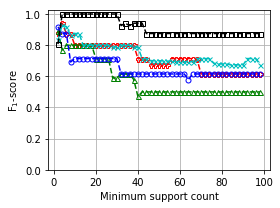

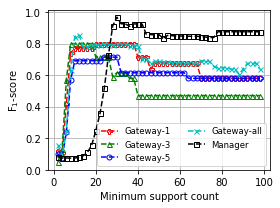

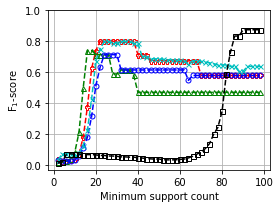

In [9]:
def plot_for_submission_w_subnet_kway_noise_wise(folder="/Users/admin/Downloads/tmp/"):
    marker_size = 5
    #figsize_value = (12,3)
    figsize_value = (4,3)
    y = 0
    
    #plt.style.use('grayscale')
    #f, ax = plt.subplots(1,3, figsize=figsize_value, sharey=True, dpi=100)
    marker_style = ['P','^','o', 'x','s']
    line_color = ['r', 'g', 'b', 'c','k']
    
    for temp_noise in [0,2,4]:
        
        plt.figure(figsize=figsize_value)
        plt.grid()
        #ax[y].set_title("False alert level {}".format(temp_noise), fontsize = 9)
        #ax[y].grid()
    
        count=  0
        for gw in [1,3,5,-1,0]:
            a_file = "{}_noise_{}_expand_sub.dat".format(gw, temp_noise)
            label = "Gateway-{}".format(gw)
            if gw == 0:
                a_file = "MFI_FPMax_Submission_AllTime_Subnet_noise_{}_expand_sub.dat".format(temp_noise)
                label = "Manager"
            if gw == -1:
                a_file = "aggr_noise_{}_expand_sub.dat".format(temp_noise)
                label = "Gateway-all"

            df_val = pd.read_csv(os.path.join(folder, a_file), header=None,sep=" ")
            recall = df_val.iloc[:,-1]
            precision = df_val.iloc[:,-2]

            f1_score = 2*recall*precision/(recall+precision)
            
            plt.plot(np.linspace(2,98,49), f1_score,\
                     line_color[count], linestyle =  '--', marker = marker_style[count],\
                     label = label, fillstyle='none', markersize = marker_size
                    )
            #ax[y].plot(np.linspace(2,98,49), 2*recall*precision/(recall+precision), \
            #            line_color[count], linestyle =  '--', marker = marker_style[count]\
            #             , label = label, fillstyle='none')
            
            plt.yticks(np.arange(0, 1.2, step=0.2))
            plt.ylabel('F$_1$-score')
            plt.xlabel('Minimum support count')
            if temp_noise == 2:
                plt.legend(ncol=2, loc="best",  prop={'size': 8.5})
            count+=1
            
            if gw == 0 or gw ==-1:
                print(a_file)
                for la in f1_score.values:
                    print(la)
        """
        if temp_noise == 0:
            ax[y].set_ylabel('F$_1$-score')
            
           
        elif temp_noise == 2:
            ax[y].set_xlabel('minimum support count')
            #ax.set_ylabel('F1-score')
            ax[y].legend(ncol=2, loc="best",  prop={'size': 8})
        elif temp_noise == 4:
            #ax.set_xlabel('Support')
            pass
        """
        y+=1
        
        plt.tight_layout()
        plt.savefig('/home/rhishi/Downloads/results_w_gw_noise_{}.pdf'.format(temp_noise),bbox_inches='tight')
    #plt.tight_layout()
    #f.savefig('/home/rhishi/Downloads/results_w_gw.pdf',bbox_inches='tight')
    
plot_for_submission_w_subnet_kway_noise_wise(folder="/home/rhishi/Documents/tmp/submission/output/out/")

Constant minimum support
0
1
3
6
6
5
7
Search w/o lookback
0
2
4
6
7
6
8
Search w/ $T_w=1$ lookback
1
3
11
16
26
31
36
Search w/ $T_w=3$ lookback
1
3
12
17
26
31
36


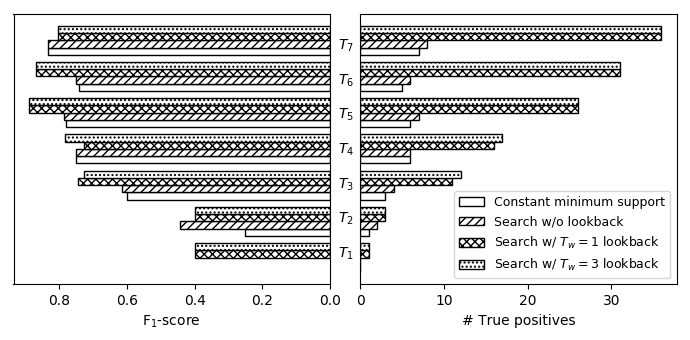

In [11]:
def plot_for_submission_ts_gw_wise(folder="/Users/admin/Downloads/tmp/"):
    
    files = {
        #'Without Subnet' : {"Simple_PatternSearcher_MFI_FPMax.dat" : "Search","BackwardLooking_PatternSearcher_MFI_FPMax.dat": "Backward lookup"},
        ' ' :\
        {"Simple_PatternSearcher_MFI_FPMax_Subnet.dat": "Search w/o lookback",\
         "BackwardLooking_Tw_1_PatternSearcher_MFI_FPMax_Subnet.dat": "Search w/ "+r"$T_w=1$"+" lookback", \
         "BackwardLooking_Tw_3_PatternSearcher_MFI_FPMax_Subnet.dat": "Search w/ "+r"$T_w=3$"+" lookback", \
        "ConstantSup_PatternSearcher_MFI_FPMax_Subnet.dat" : "Constant minimum support"}
            }
    
    color_list = ['r', 'g', 'b', 'k']
    
    bar_data1 = {}
    bar_data2 = {}
    
    for a_title, files in files.items():
            count = 0
            for a_file, a_label in files.items():
                df_val = pd.read_csv(os.path.join(folder, a_file), header=None, sep=" ")
                recall = df_val.iloc[:,-1]
                precision = df_val.iloc[:,-2]
                
                tp = df_val.iloc[:,2]
                
                ts = df_val.iloc[:,0]
                bar_data2[a_label] = tp.tolist()
                bar_data1[a_label] = ((2*recall*precision/(recall+precision)).tolist())
            count+=1
            
    a1 = bar_data1
    a2 = bar_data2
    scale = 4
    t=[x*scale for x in [1,2,3,4,5,6,7]]
    w = 0.20 * scale
    
    figsize_value = (7,3.5)
    f, ax = plt.subplots(1,2, figsize=figsize_value, sharey=True, dpi=100)
    #plt.style.use('grayscale')

    #ax = f.add_subplot(121)
    #ax = plt.subplot()

    k1 = ["Constant minimum support", "Search w/o lookback",\
          "Search w/ "+r"$T_w=1$"+" lookback",\
          "Search w/ "+r"$T_w=3$"+" lookback"]

    hatch_list = ['=','////', 'xxxx', '....','\\\\']
    count = 0
    for k in k1:
        a1[k].pop(0)
        a1[k].pop(-1)
        ax[0].barh([x - w*(3-count) for x in t],a1[k], height=w,color='w',\
                   edgecolor=color_list[-1], hatch=hatch_list[count],label = k)
        count+=1
    ax[0].set_yticks([])
    #ax[0].set_xticklabels(('1','2','3','4','5','6','7'))
    ax[0].set_xlabel('F$_1$-score')
    ax[0].invert_xaxis()
    #ax.set_ylabel('# Attack patterns')
    #ax[0].set_xlabel('Timeslot')
    #lgd = ax.legend(loc='upper right',bbox_to_anchor=(1.0, -0.13),  ncol=2)
    
    
    #ax = f.add_subplot(122)
    #ax = plt.subplot()

    count = 0
    for k in k1:
        a2[k].pop(0)
        a2[k].pop(-1)
        ax[1].barh([x - w*(3-count) for x in t], a2[k],height=w, color='w'\
                   ,edgecolor=color_list[-1], hatch=hatch_list[count],label = k)
        print(k)
        for jj in a2[k]:
            print(jj)
        
        count+=1
   # ax[1].set_yticks([x-0.5 for x in t])
   # ax[1].set_yticklabels(('1','2','3','4','5','6','7'))
    
    ax[1].set_xlabel('# True positives')
    #ax[1].set_xlabel('Timeslot')
    ax[1].legend(loc='best',  ncol=1, prop={'size': 9})
    #lgd = ax.legend(loc='upper right',bbox_to_anchor=(1.0, -0.13),  ncol=2)

    for i in range(0,len(t)):
        f.text(0.49,0.25 + (i*0.099),'$T_{}$'.format(i+1))
    """
    f.text(0.49,0.34,'$T_2$')
    f.text(0.49,0.43,'$T_3$')
    """
    plt.tight_layout()
    
    f.savefig('/home/rhishi/Downloads/results_w_ts.pdf')
    #f.savefig('/home/rhishi/Downloads/results_w_ts.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
    return bar_data1
a1=plot_for_submission_ts_gw_wise(folder = "/home/rhishi/Documents/tmp/submission/timestep/out/")
#a1=plot_for_submission_ts_gw_wise(folder = "/home/rhishi/Documents/tmp/submission/output/kushans_way/time_slots")

In [ ]:
scale = 6
w = 0.15 * scale
t=[x*scale for x in [1,2,3,4,5,6,7,]]
a1=[x - w*(3-0) for x in t]
a2=[x - w*(3-1) for x in t]
a3=[x - w*(3-2) for x in t]

a11=[x + w*(3-0) for x in t]

In [ ]:
t,a1,a2,a3,a11